In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'

In [2]:
df = pd.read_csv(r'E:\Excel_files\Machine Learning\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check the duplicates

df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
Name: count, dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# remove duplicates

df = df.drop_duplicates()

In [9]:
df
df.duplicated().value_counts()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


False    1337
Name: count, dtype: int64

In [10]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.charges.quantile(q = [0.25, 0.5, 0.75 ]).values)

In [11]:
print(Q1, Q2, Q3)

4746.344 9386.1613 16657.71745


In [12]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

11911.37345 34524.777625 -13120.716174999998


In [13]:
(df[(df.charges > UL) | (df.charges < LL)]).count()

age         139
sex         139
bmi         139
children    139
smoker      139
region      139
charges     139
dtype: int64

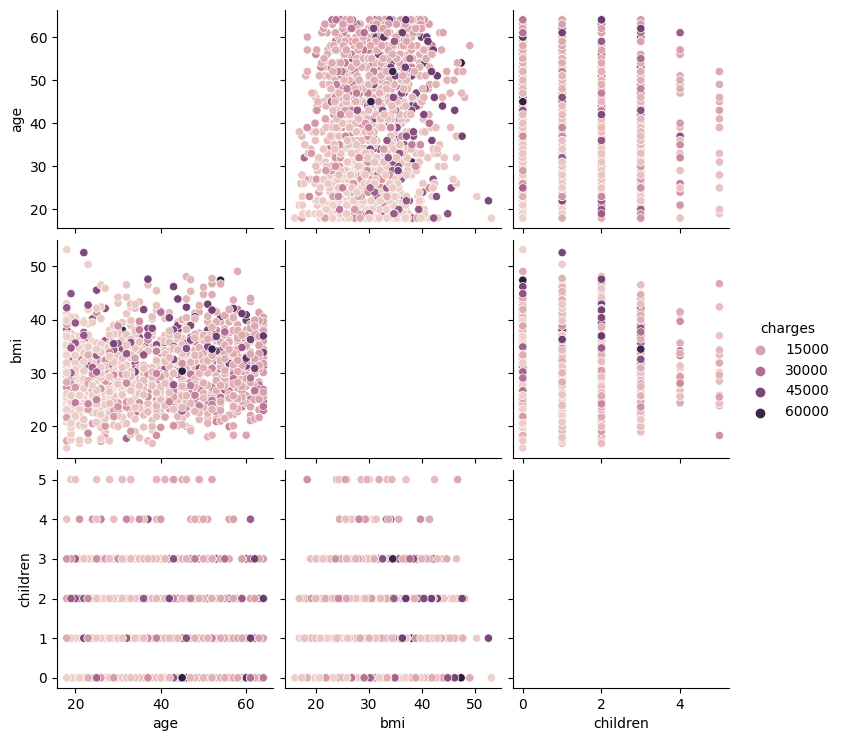

In [14]:
sns.pairplot(df, hue = 'charges')

<Axes: xlabel='smoker', ylabel='charges'>

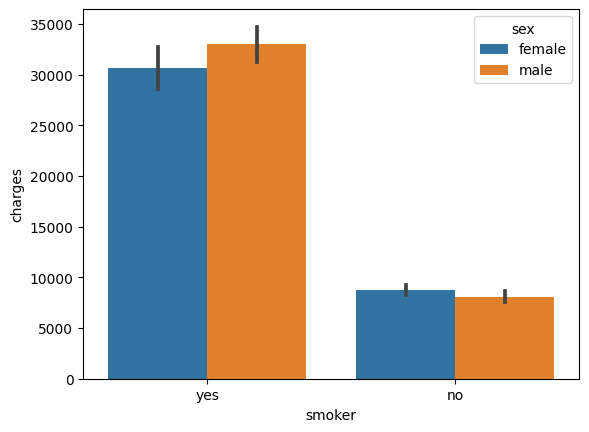

In [16]:
sns.barplot(data = df, x ="smoker", y = 'charges', hue = 'sex' )

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [18]:
# Identify the inputs(X) and output (y)

y = df['charges']
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [19]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 100)

In [20]:
X_train.head()

,age,sex,bmi,children,smoker,region
1000,30,male,22.990,2,yes,northwest
885,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1132,57,male,40.280,0,no,northeast
1188,43,female,25.270,1,yes,northeast


In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


## b. Seperate the Categorial  and Numerical Columns:

In [22]:
X_train.head()

,age,sex,bmi,children,smoker,region
1000,30,male,22.990,2,yes,northwest
885,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1132,57,male,40.280,0,no,northeast
1188,43,female,25.270,1,yes,northeast


In [23]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [24]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
1000,male,yes,northwest
885,male,yes,southeast
517,male,no,northwest
1132,male,no,northeast
1188,female,yes,northeast


In [25]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,age,bmi,children
1000,30,22.990,2
885,32,28.930,1
517,45,30.495,2
1132,57,40.280,0
1188,43,25.270,1


## c. Scaling the Numerical Features

In [26]:
X_train_num.head()

,age,bmi,children
1000,30,22.990,2
885,32,28.930,1
517,45,30.495,2
1132,57,40.280,0
1188,43,25.270,1


In [27]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1000,-0.644567,-1.234380,0.785181
885,-0.502636,-0.267219,-0.065361
517,0.419914,-0.012403,0.785181
1132,1.271498,1.580808,-0.915903
1188,0.277983,-0.863146,-0.065361


In [28]:
X_train_num.describe()

,age,bmi,children
count,1002.000000,1002.000000,1002.000000
mean,39.082834,30.571173,1.076846
std,14.098417,6.144754,1.176307
min,18.000000,15.960000,0.000000
25%,26.000000,26.083750,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


In [29]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 3
Mean of each column: [39.08283433 30.57117265  1.07684631]
std of each column: [14.09138002  6.14168693  1.17572029]


## d. Applying OneHotEncoding on Categorical Columns

In [30]:
X_train_cat['sex'].value_counts(normalize= True)

sex
male      0.505988
female    0.494012
Name: proportion, dtype: float64

In [31]:
X_train_cat['smoker'].value_counts(normalize = True)

smoker
no     0.790419
yes    0.209581
Name: proportion, dtype: float64

In [32]:
X_train_cat['region'].value_counts(normalize = True)

region
southeast    0.270459
southwest    0.250499
northeast    0.240519
northwest    0.238523
Name: proportion, dtype: float64

In [33]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop= 'first', min_frequency= 1000, sparse_output= False)

# column names are (annoyingly) Lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)\

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                              columns = encoder_.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)

X_train_cat_ohe.head()

""
1000
885
517
1132
1188


In [34]:
encoder_.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [47]:
sex_encoder = {"female": 1, "male": 2}
smoker_encoder = {"no": 1, "yes": 2}
region_encoder = {"northeast": 1, "northwest" :2, "southeast" :3, "southwest":4}

In [35]:
encoder_.infrequent_categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [36]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1000,1.0,1.0,1.0,0.0,0.0
885,1.0,1.0,0.0,1.0,0.0
517,1.0,0.0,1.0,0.0,0.0
1132,1.0,0.0,0.0,0.0,0.0
1188,0.0,1.0,0.0,0.0,0.0


## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [38]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1000,-0.644567,-1.234380,0.785181,1.0,1.0,1.0,0.0,0.0
885,-0.502636,-0.267219,-0.065361,1.0,1.0,0.0,1.0,0.0
517,0.419914,-0.012403,0.785181,1.0,0.0,1.0,0.0,0.0
1132,1.271498,1.580808,-0.915903,1.0,0.0,0.0,0.0,0.0
1188,0.277983,-0.863146,-0.065361,0.0,1.0,0.0,0.0,0.0


## f. Preparing Test Data

In [39]:
X_test.head()

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
816,24,female,24.225,0,no,northwest
157,18,male,25.175,0,yes,northeast


In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 12 to 625
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [41]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
12,male,no,southwest
306,female,no,southwest
318,female,no,northwest
816,female,no,northwest
157,male,yes,northeast


In [42]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
12,23,34.400,0
306,28,27.500,2
318,44,27.645,0
816,24,24.225,0
157,18,25.175,0


In [43]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
12,-1.141324,0.623416,-0.915903
306,-0.786497,-0.500054,0.785181
318,0.348948,-0.476444,-0.915903
816,-1.070359,-1.033295,-0.915903
157,-1.496151,-0.878614,-0.915903


In [52]:
X_test_cat_ohe = pd.DataFrame(index = X_test_cat.index)

X_test_cat_ohe.head()

""
12
306
318
816
157


In [53]:

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,1.0,0.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,1.0
318,0.0,0.0,1.0,0.0,0.0
816,0.0,0.0,1.0,0.0,0.0
157,1.0,1.0,0.0,0.0,0.0


In [54]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,-1.141324,0.623416,-0.915903,1.0,0.0,0.0,0.0,1.0
306,-0.786497,-0.500054,0.785181,0.0,0.0,0.0,0.0,1.0
318,0.348948,-0.476444,-0.915903,0.0,0.0,1.0,0.0,0.0
816,-1.070359,-1.033295,-0.915903,0.0,0.0,1.0,0.0,0.0
157,-1.496151,-0.878614,-0.915903,1.0,1.0,0.0,0.0,0.0


## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [56]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [57]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4380.485065
306,20177.67113,4533.932848
318,7421.19455,8443.834136
816,2842.76075,1935.290752
157,15518.18025,24525.711880


<Axes: xlabel='charges', ylabel='Count'>

<Axes: xlabel='charges', ylabel='Count'>

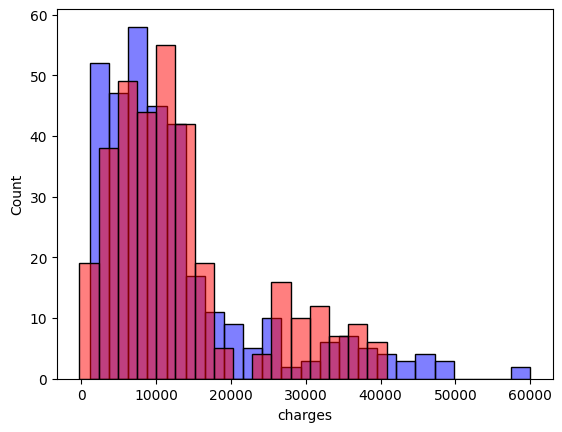

In [58]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [59]:
# Evaluation

from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_LR)

print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error:  3930.8342796357174
Mean Squared Error:  31260861.591385353
Root Mean Squared Error:  5591.141349615958


## KNN Regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [61]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,5679.163466
306,20177.67113,4492.306400
318,7421.19455,7604.879520
816,2842.76075,3306.154030
157,15518.18025,23431.680346


<Axes: xlabel='charges', ylabel='Count'>

<Axes: xlabel='charges', ylabel='Count'>

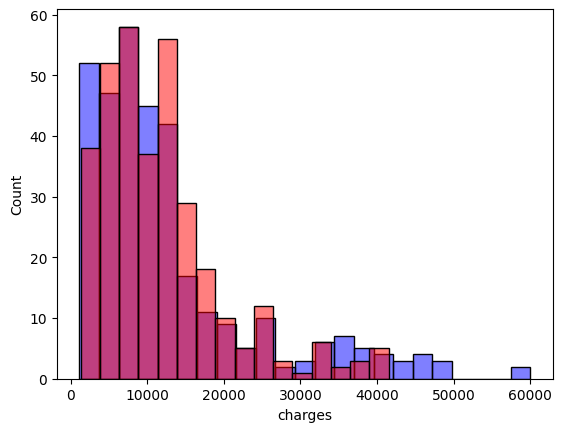

In [63]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [64]:
from sklearn import metrics

MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

Mean Absolute Error:  3981.2189746537315
Mean Squared Error:  42514246.23043421
Root Mean Squared Error:  6520.294949650223


## Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

In [66]:
y_test_pred = regressor.predict(X_test_transformed)

In [67]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,1837.28190
306,20177.67113,4529.47700
318,7421.19455,7419.47790
816,2842.76075,22395.74424
157,15518.18025,16297.84600


<Axes: xlabel='charges', ylabel='Count'>

<Axes: xlabel='charges', ylabel='Count'>

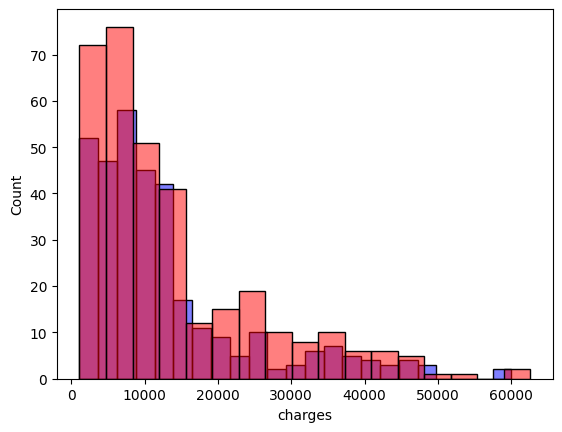

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [69]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  3294.541891385075
Mean Squared Error:  45106031.796394415
Root Mean Squared Error:  6716.102425990421


## Ensemble

## Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [71]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [72]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4857.188244
306,20177.67113,4440.297820
318,7421.19455,16739.401679
816,2842.76075,8761.729407
157,15518.18025,16439.763345


<Axes: xlabel='charges', ylabel='Count'>

<Axes: xlabel='charges', ylabel='Count'>

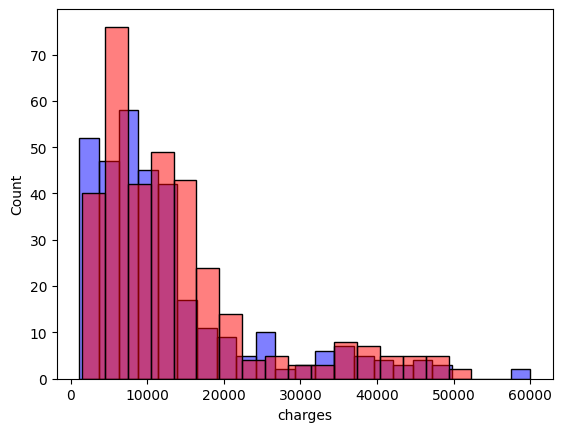

In [73]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [74]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  2771.5551408755364
Mean Squared Error:  21102376.481489487
Root Mean Squared Error:  4593.7323040736155


## Boosting

## Gradient Boosted Decision Tree

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [76]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [77]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4173.424913
306,20177.67113,6385.739177
318,7421.19455,10052.053191
816,2842.76075,6364.476207
157,15518.18025,15989.795538


<Axes: xlabel='charges', ylabel='Count'>

<Axes: xlabel='charges', ylabel='Count'>

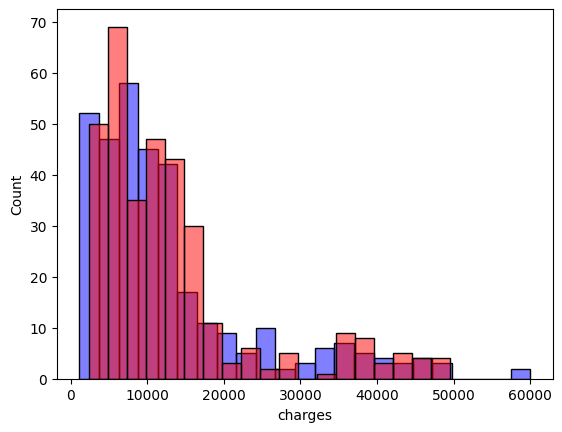

In [78]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [79]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  2294.9388794351294
Mean Squared Error:  15326953.05967962
Root Mean Squared Error:  3914.9652692814043


In [83]:
df_data = [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
                   ['Gradient Boosting Decision Tree', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT ]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])

In [84]:
data

,Algorithm,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,3930.834280,3.126086e+07,5591.141350
1,K-Nearest Neighbor Regression,3981.218975,4.251425e+07,6520.294950
2,Decision Tree Regression,3294.541891,4.510603e+07,6716.102426
3,Random Forest Regression,2771.555141,2.110238e+07,4593.732304
4,Gradient Boosting Decision Tree,2294.938879,1.532695e+07,3914.965269


## Observation

**1. By observing the above table we can say that Gradient Boosting Decision Tree Mean absolute error is less i.e. 2294.93 compaired to other algorithms.**

**2. By compairing all algorithms we can easily says that Gradient Boosting Decision tree is the best algorithm for the Medical Cost Prediction.**

## Conclusion

**Gradient Boosting Decision tree is the best algorithm for the Medical Cost Prediction.**

In [89]:
## Cross Validation

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

tuned_parameters = [{'n_estimators':[i for i in range(1, 51)]}]

clf = GridSearchCV(
      estimator = GradientBoostingRegressor(),
      param_grid = tuned_parameters,
      scoring = 'neg_mean_absolute_error',
      cv = 5,
      return_train_score=True,
      verbose=1)

clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
clf.predict(X_test_transformed)

array([ 4683.1501986 ,  6459.82629982,  9825.48100428,  5737.32824352,
       16344.08578523, 27805.06747369,  6850.06274522,  8880.56199904,
       19679.48468571, 14689.34645626, 10219.99167863, 12407.02240716,
       10364.19808422,  4624.85024536,  9509.44107693, 40052.42333765,
        7497.85001933, 11082.2642537 ,  5966.51877177, 12091.74916043,
       12709.0265632 , 14792.01391991, 14427.40240263, 23650.29502611,
       12800.84585275, 40024.89576934,  4738.43519629, 46616.52071549,
       23650.29502611,  7363.77347314, 16019.12672855,  3359.87334104,
       46597.06553021, 16813.10809172,  2954.20950055, 14835.01878184,
       11071.56234108,  7334.04376327,  4913.38936249, 29875.13221099,
       10225.78764672,  8589.74532662,  4681.3095636 ,  6074.55831885,
        3089.4321168 ,  4895.98061594,  5674.95564536,  5645.50895397,
        4094.97472654,  3314.967823  , 14543.21269407, 13194.11273187,
        9735.58326223,  6949.32933446,  7603.80171339,  7732.14881458,
      

In [94]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_estimators': 50}
GradientBoostingRegressor(n_estimators=50)

Score on Test Data:  -2281.5785878044226


In [97]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014019,0.011731,0.003608,0.001021,1,{'n_estimators': 1},-7577.888224,-8762.546355,-9438.508095,-8595.430442,...,-8687.373782,624.496914,50,-9075.670498,-8555.834521,-8306.268984,-8644.003711,-8693.373784,-8655.030299,248.999696
1,0.010013,0.002454,0.004008,0.001266,2,{'n_estimators': 2},-6961.180612,-8057.345943,-8785.718557,-7954.433350,...,-8032.640486,609.947028,49,-8393.059958,-7919.364491,-7635.534232,-7972.330122,-8033.252194,-7990.708199,243.011586
2,0.011617,0.003779,0.003206,0.000749,3,{'n_estimators': 3},-6421.093047,-7409.648188,-8205.172079,-7388.113170,...,-7448.741071,595.154968,48,-7774.573061,-7339.430989,-7043.446861,-7379.706994,-7439.007106,-7395.233002,233.633672
3,0.014220,0.001834,0.003207,0.001472,4,{'n_estimators': 4},-5941.042758,-6833.969308,-7669.338004,-6871.665847,...,-6921.150992,577.287195,47,-7225.166638,-6823.836013,-6512.537345,-6846.774818,-6912.709094,-6864.204782,227.266169
4,0.012418,0.000489,0.002405,0.000492,5,{'n_estimators': 5},-5507.557869,-6334.686846,-7188.914234,-6416.173896,...,-6451.063656,561.565786,46,-6730.029126,-6367.775337,-6036.221627,-6369.581071,-6438.175584,-6388.356549,220.905950


Text(0.5, 0, 'n_estimators')

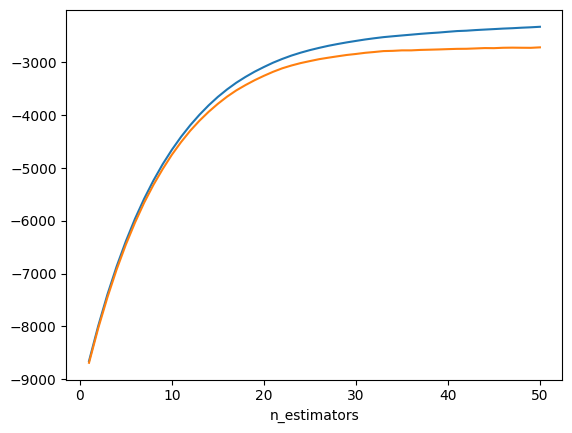

In [98]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
